### Data Import & Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering 
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = "Data/customer_data.csv"
df = pd.read_csv(data_path)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print(f"The dataset dimensions are: {df.shape}")
print("-"*100)
print("Null Values:")
print(df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False))
print("-"*100)
print("Columns:")
print(df.columns)

The dataset dimensions are: (2240, 29)
----------------------------------------------------------------------------------------------------
Null Values:
Income    24
dtype: int64
----------------------------------------------------------------------------------------------------
Columns:
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [4]:
df.dropna(inplace=True)

In [5]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
reference_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (reference_date - df['Dt_Customer']).dt.days
df['Age'] = reference_date.year - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_Tenure,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,663,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,113,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,312,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,139,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,161,33


In [6]:
df.nunique().sort_values(ascending=True)

Z_Revenue                 1
Z_CostContact             1
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
Complain                  2
AcceptedCmp2              2
Response                  2
Teenhome                  3
Kidhome                   3
Education                 5
Marital_Status            8
NumStorePurchases        14
NumCatalogPurchases      14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Age                      59
Recency                 100
MntFruits               158
MntSweetProducts        176
MntFishProducts         182
MntGoldProds            212
MntMeatProducts         554
Customer_Tenure         662
Dt_Customer             662
MntWines                776
Income                 1974
ID                     2216
dtype: int64

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_Tenure', 'Age'],
      dtype='object')

In [8]:
# Combining Common Columns:
df['Campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['Mnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Purchases'] = df['NumDealsPurchases'] + df[ 'NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']
df['Children'] = df['Kidhome'] + df['Teenhome']

In [9]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'ID','Year_Birth','Dt_Customer','Kidhome','Teenhome',
'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']
,axis=1,inplace=True)

In [10]:
df

,Education,Marital_Status,Income,Recency,Complain,Response,Customer_Tenure,Age,Campaigns,Mnt,Purchases,Children
0,Graduation,Single,58138.0,58,0,1,663,57,0,1617,32,0
1,Graduation,Single,46344.0,38,0,0,113,60,0,27,11,2
2,Graduation,Together,71613.0,26,0,0,312,49,0,776,25,0
3,Graduation,Together,26646.0,26,0,0,139,30,0,53,14,1
4,PhD,Married,58293.0,94,0,0,161,33,0,422,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,46,0,0,381,47,0,1341,23,1
2236,PhD,Together,64014.0,56,0,0,19,68,1,444,29,3
2237,Graduation,Divorced,56981.0,91,0,0,155,33,1,1241,25,0
2238,Master,Together,69245.0,8,0,0,156,58,0,843,26,1


In [11]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Complain',
       'Response', 'Customer_Tenure', 'Age', 'Campaigns', 'Mnt', 'Purchases',
       'Children'],
      dtype='object')

### Data Visualization

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Education        2216 non-null   object 
 1   Marital_Status   2216 non-null   object 
 2   Income           2216 non-null   float64
 3   Recency          2216 non-null   int64  
 4   Complain         2216 non-null   int64  
 5   Response         2216 non-null   int64  
 6   Customer_Tenure  2216 non-null   int64  
 7   Age              2216 non-null   int64  
 8   Campaigns        2216 non-null   int64  
 9   Mnt              2216 non-null   int64  
 10  Purchases        2216 non-null   int64  
 11  Children         2216 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 225.1+ KB


In [13]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

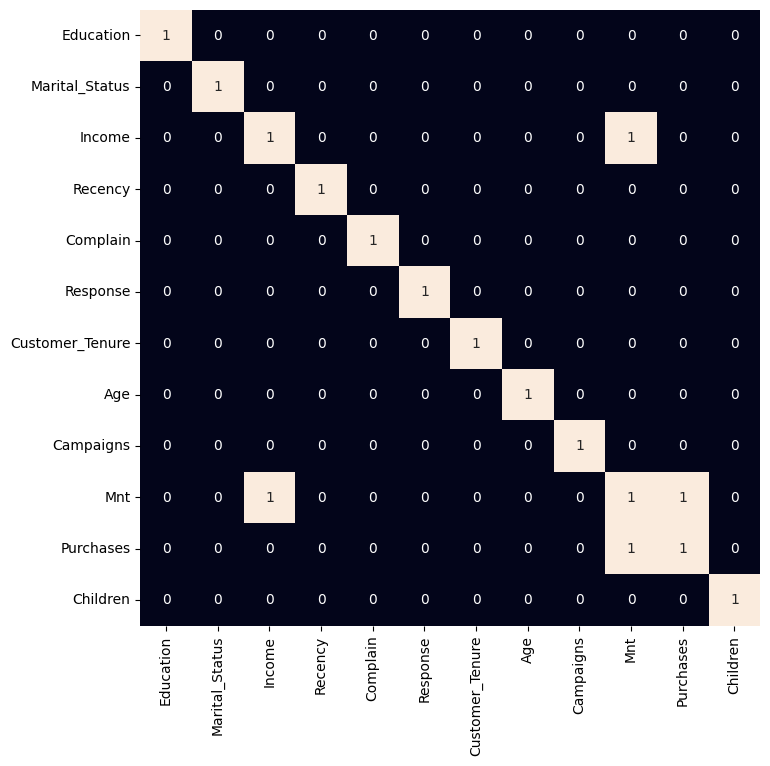

In [14]:
# Check for high inter-feature correlation
plt.figure(figsize=(8,8))
sns.heatmap(np.abs(df.corr()) > 0.6, annot=True, cbar=False)
plt.show()

In [15]:
df.describe()

,Education,Marital_Status,Income,Recency,Complain,Response,Customer_Tenure,Age,Campaigns,Mnt,Purchases,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,2.393953,3.726083,52247.251354,49.012635,0.009477,0.150271,353.521209,45.179603,0.298285,607.075361,20.199910,0.947202
std,1.124141,1.077731,25173.076661,28.948352,0.096907,0.357417,202.434667,11.985554,0.679209,602.900476,7.283193,0.749062
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,5.000000,0.000000,0.000000
25%,2.000000,3.000000,35303.000000,24.000000,0.000000,0.000000,180.000000,37.000000,0.000000,69.000000,14.000000,0.000000
50%,2.000000,4.000000,51381.500000,49.000000,0.000000,0.000000,355.500000,44.000000,0.000000,396.500000,19.000000,1.000000
75%,3.000000,5.000000,68522.000000,74.000000,0.000000,0.000000,529.000000,55.000000,0.000000,1048.000000,25.000000,1.000000
max,4.000000,7.000000,666666.000000,99.000000,1.000000,1.000000,699.000000,121.000000,4.000000,2525.000000,46.000000,3.000000


In [15]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Customer_Tenure,Age,Campaigns,Mnt,Purchases,Children
0,2,4,58138.0,58,0,1,663,57,0,1617,32,0
1,2,4,46344.0,38,0,0,113,60,0,27,11,2
2,2,5,71613.0,26,0,0,312,49,0,776,25,0
3,2,5,26646.0,26,0,0,139,30,0,53,14,1
4,4,3,58293.0,94,0,0,161,33,0,422,24,1


In [16]:
df_scaled = StandardScaler().fit_transform(df)

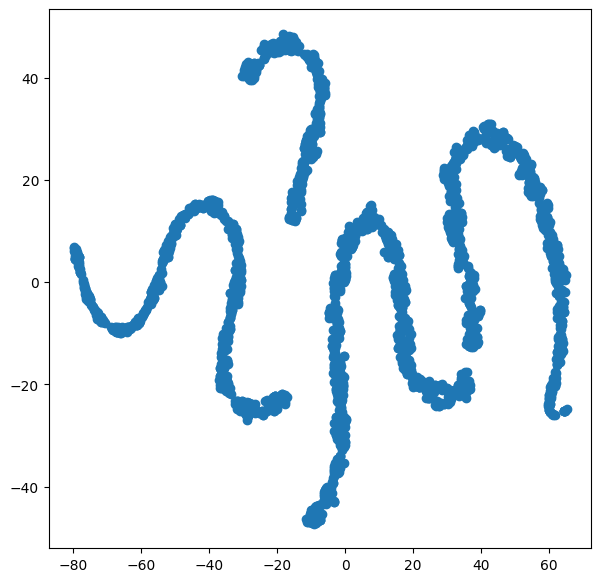

In [17]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

### K-MEANS CLUSTERING

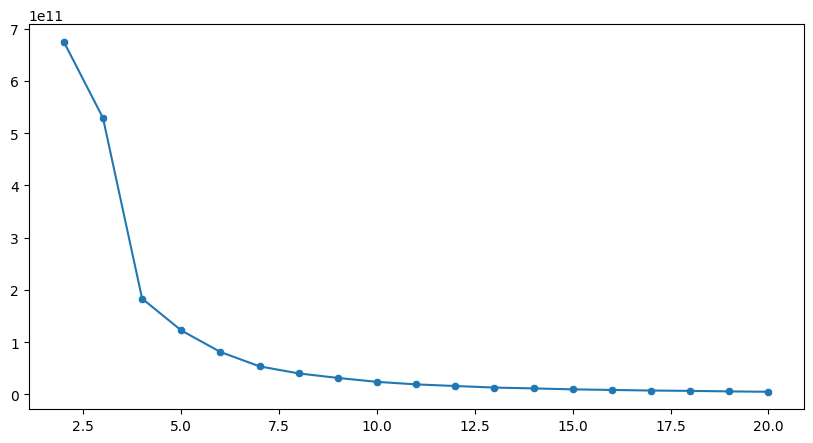

In [18]:
# Elbow Visualization for k - value estimation:
inertia, xrange = [],[]
for n_ in range(2, 21):
    model = KMeans(init='k-means++',n_clusters=n_,max_iter=500,random_state=22)
    model.fit(df)
    inertia.append(model.inertia_)
    xrange.append(n_)
plt.figure(figsize=(10, 5))
sns.lineplot(x=xrange, y=inertia)
sns.scatterplot(x=xrange, y=inertia)
plt.show()

Based on elbow plot and TNSE data visualization, we can conclude that n = 4 is an appropriate cluster number

In [19]:
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 'y': tsne_data[:, 1]})

In [20]:
kmeans_model = KMeans(init='k-means++',n_clusters=4,max_iter=500,random_state=22)
kmeans_segments = kmeans_model.fit_predict(df)
df_tsne['Kmeans'] = kmeans_segments

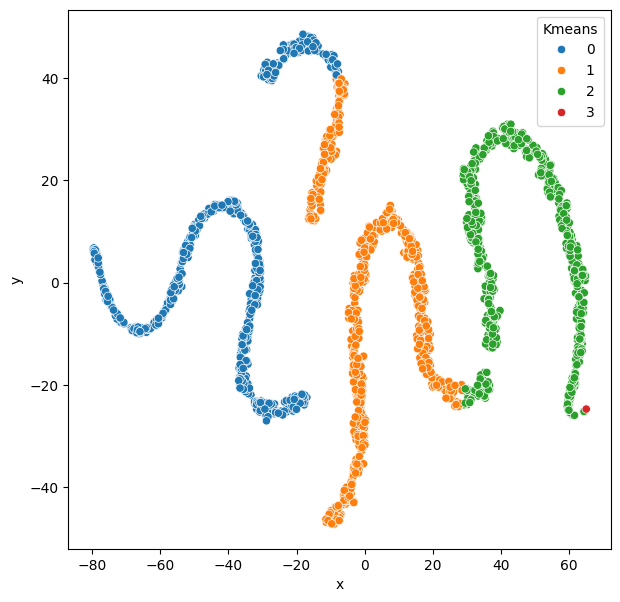

In [21]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='x', y='y', hue='Kmeans', data=df_tsne, palette='tab10')
plt.show()

### Spectral Clustering

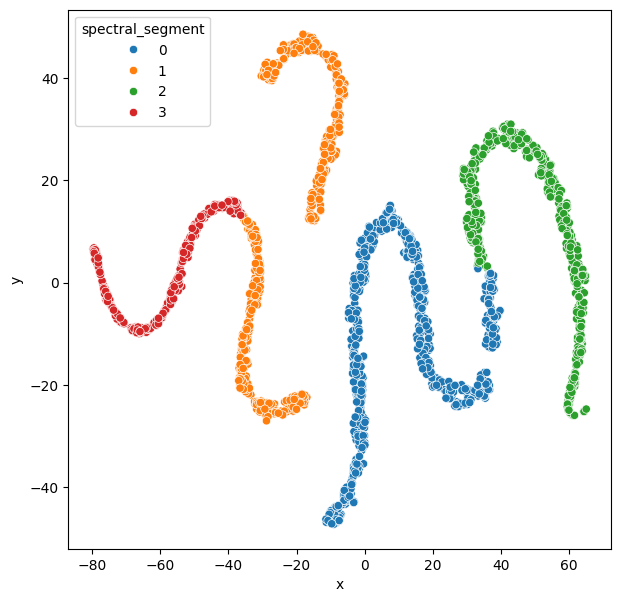

In [22]:
spectral_cluster_model = SpectralClustering(n_clusters=4,affinity="nearest_neighbors")
spectral_segment = spectral_cluster_model.fit_predict(df)
df_tsne["spectral_segment"] = spectral_segment

plt.figure(figsize=(7, 7))
sns.scatterplot(x='x', y='y', hue='spectral_segment', data=df_tsne, palette='tab10')
plt.show()

### DBSCAN

In [23]:
eps_, samp = 3,3 
dbscan_model = DBSCAN(eps=eps_, min_samples=samp)
dbscan_labels = dbscan_model.fit_predict(df)
df_tsne["dbscan_segment"] = dbscan_labels

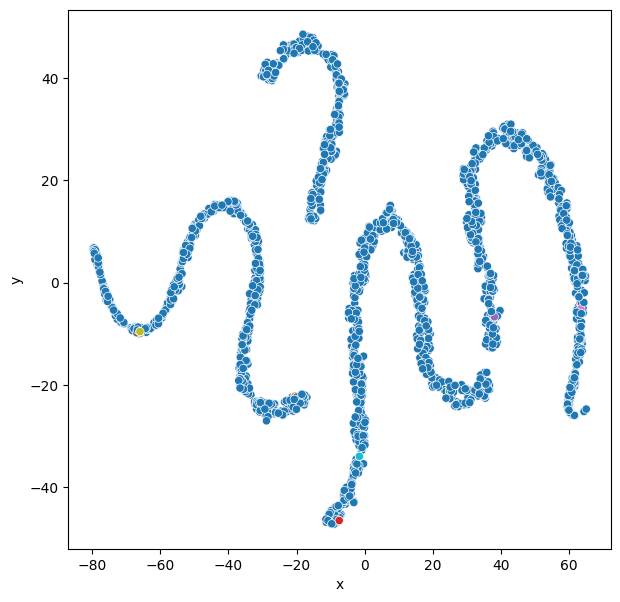

In [31]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='x', y='y', hue='dbscan_segment', data=df_tsne, palette='tab10', legend=False)
plt.show()


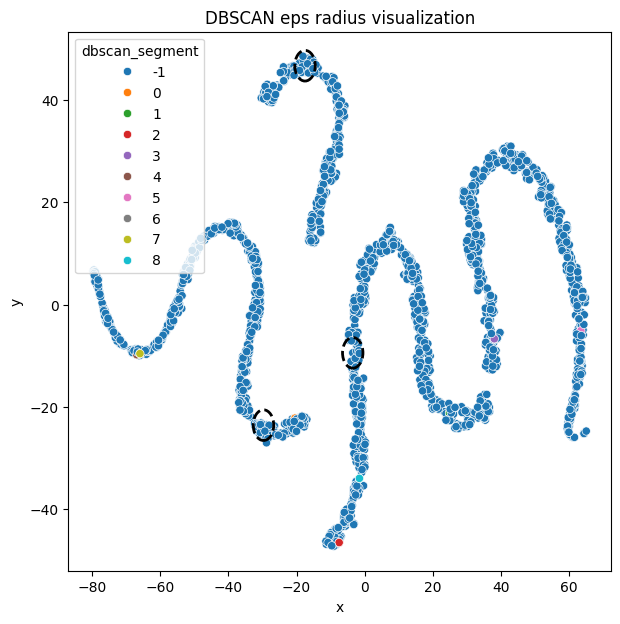

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle
import numpy as np



plt.figure(figsize=(7, 7))
ax = sns.scatterplot(
    x='x',
    y='y',
    hue='dbscan_segment',
    data=df_tsne,
    palette='tab10'
)

# Pick a few random points to visualize eps radius
sample_points = df_tsne.sample(3, random_state=42)

for _, row in sample_points.iterrows():
    circle = Circle((row['x'], row['y']), eps_, 
                    fill=False, 
                    linestyle='--', 
                    linewidth=2)
    ax.add_patch(circle)

plt.title("DBSCAN eps radius visualization")
plt.show()

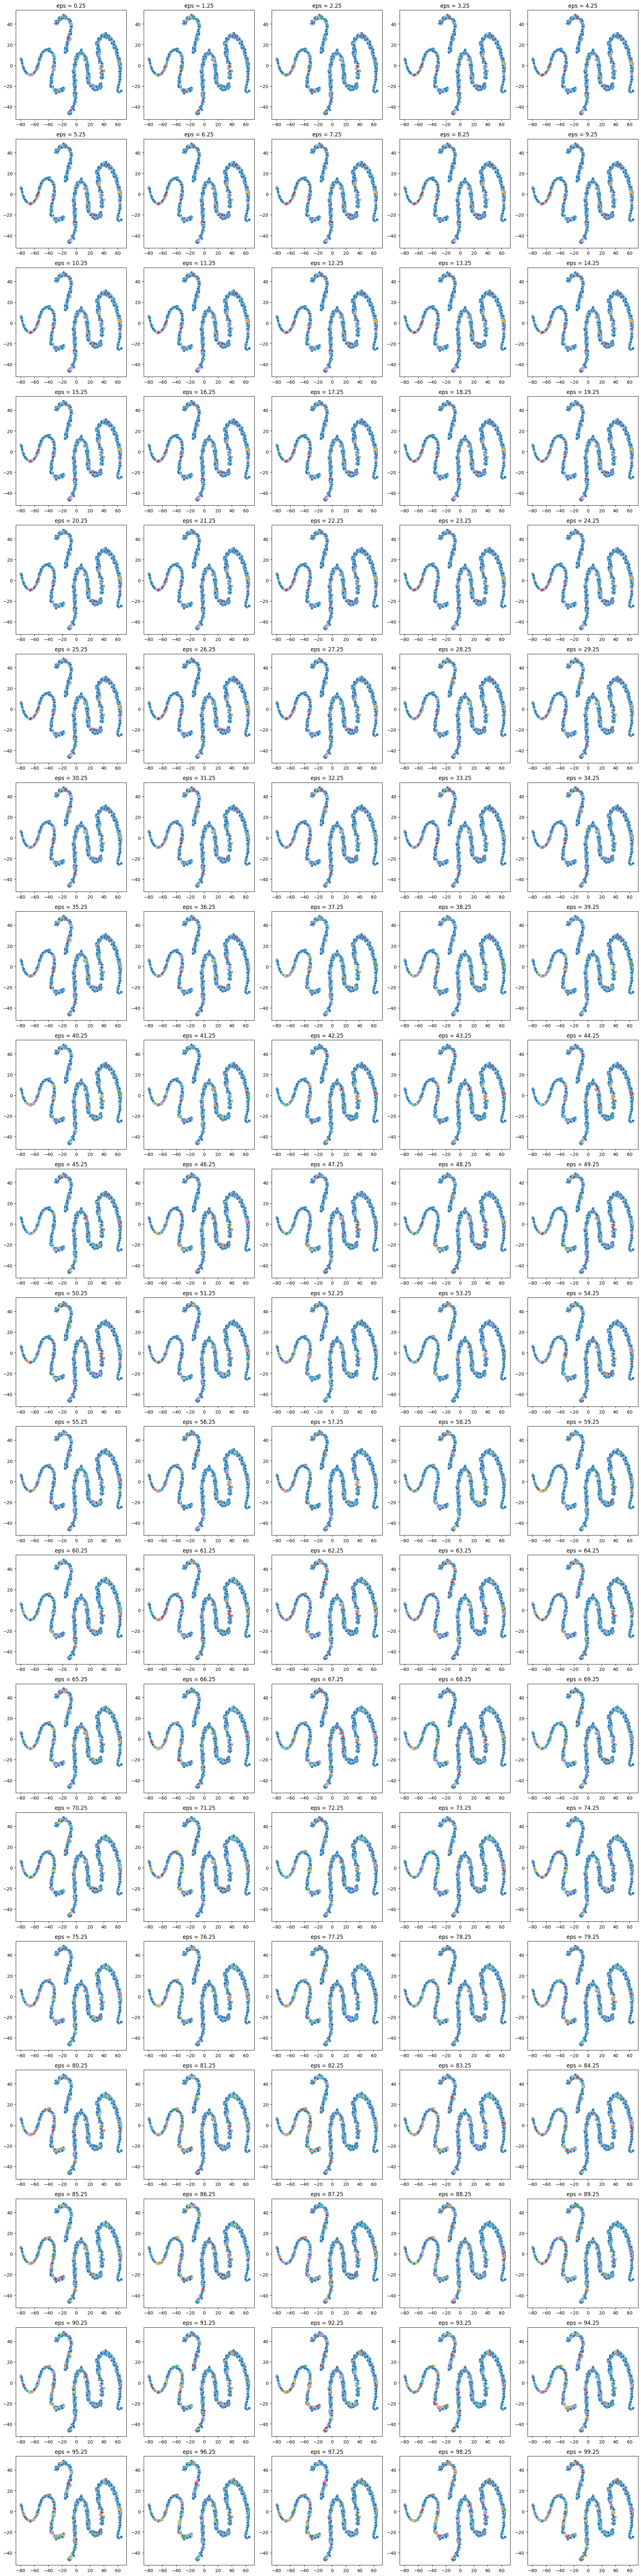

In [41]:
import math
eps_values = [ijk/100 for ijk in range(25, 10000, 100)]

n_plots = len(eps_values)
n_cols = 5  # choose how many columns you want
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()  # make indexing easier

for ax, eps_ in zip(axes, eps_values):
    dbscan_model = DBSCAN(eps=eps_, min_samples=2)
    dbscan_labels = dbscan_model.fit_predict(df)

    df_tsne["dbscan_segment"] = dbscan_labels

    sns.scatterplot(
        x='x',
        y='y',
        hue='dbscan_segment',
        data=df_tsne,
        palette='tab10',
        legend=False,
        ax=ax
    )

    ax.set_title(f"eps = {eps_}")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Remove empty subplots if any
for i in range(len(eps_values), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

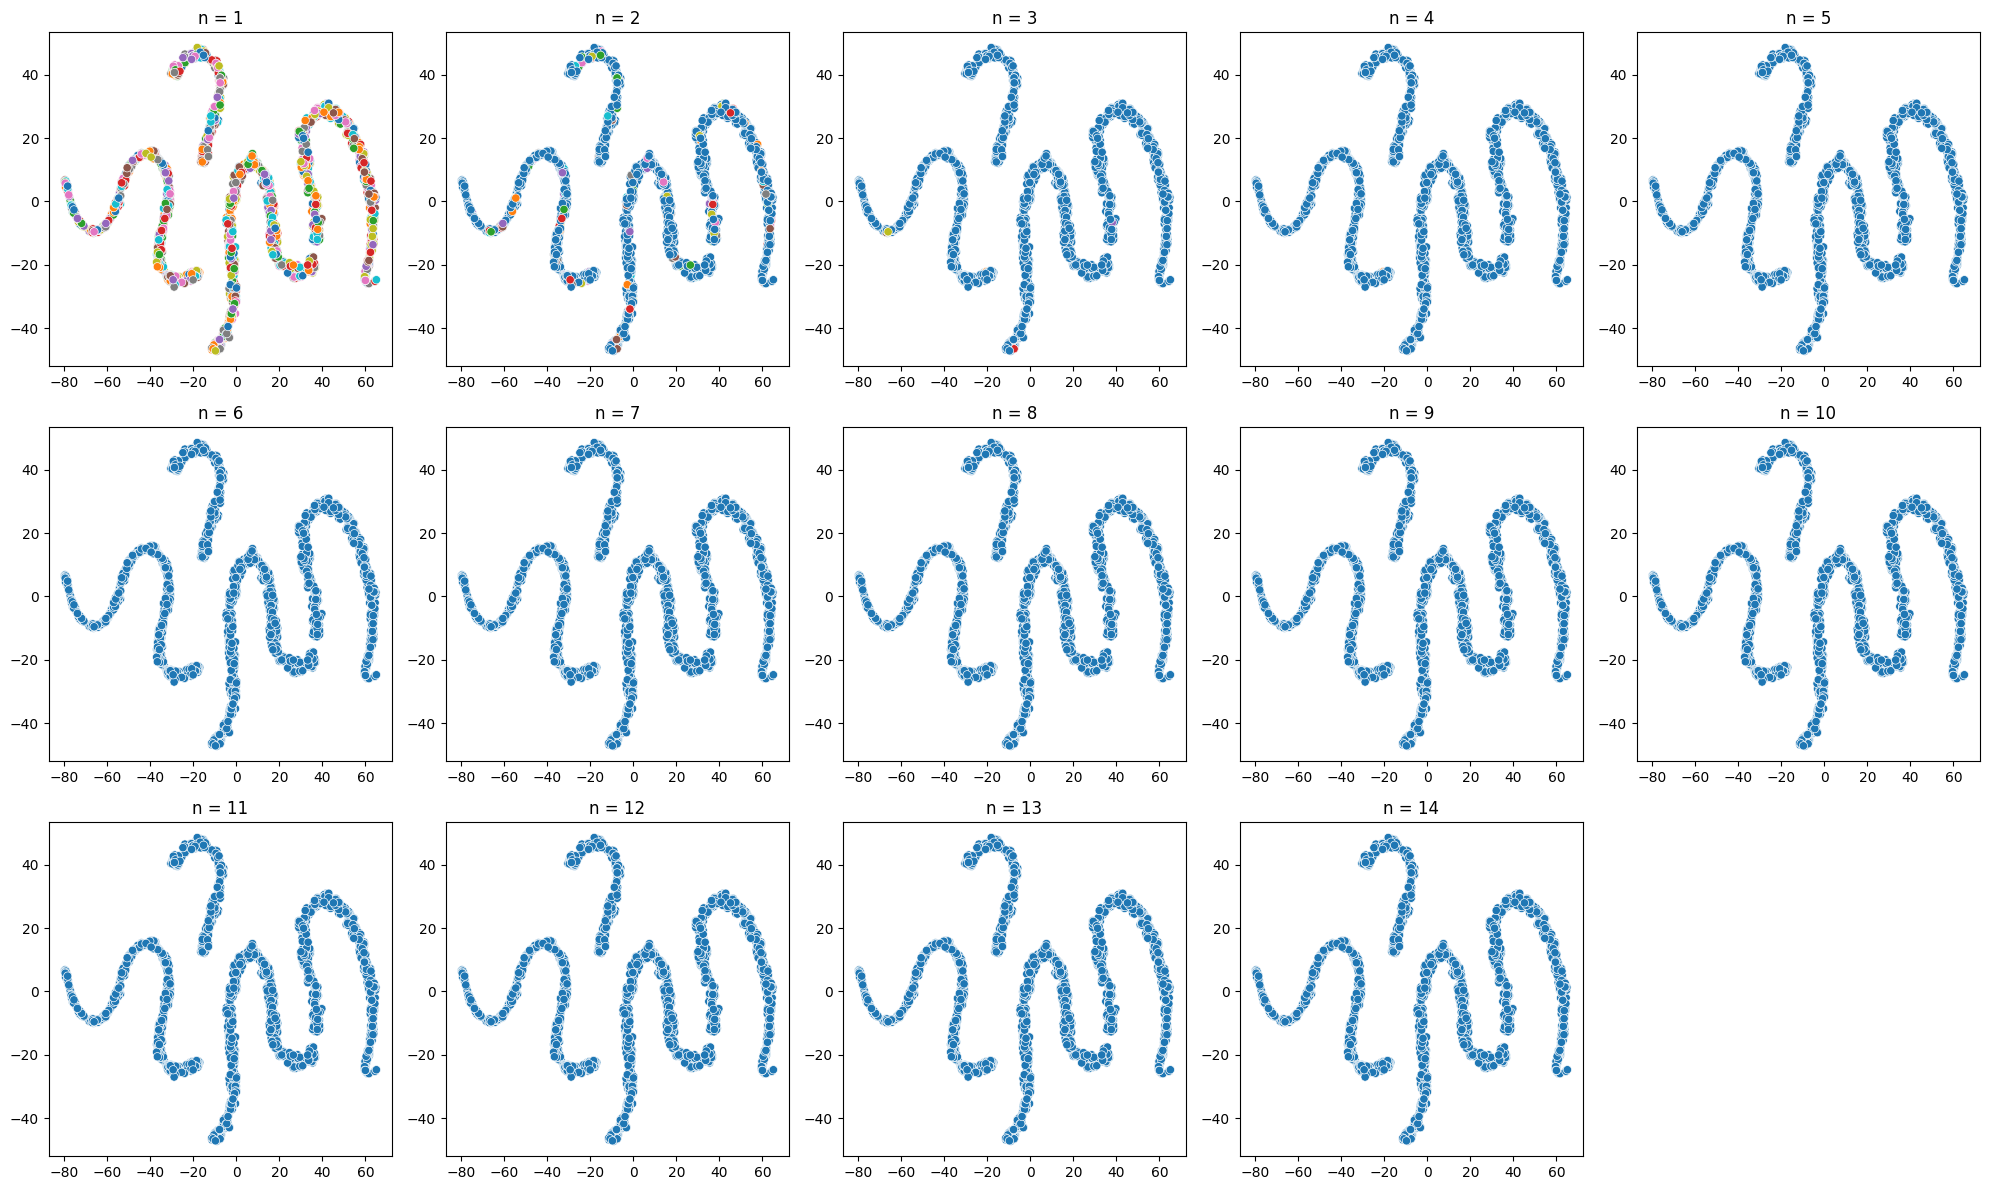

In [36]:
import math
neigh_values = [i for i in range(1,15)]

n_plots = len(neigh_values)
n_cols = 5  # choose how many columns you want
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.flatten()  # make indexing easier

for ax, n_ in zip(axes, neigh_values):
    dbscan_model = DBSCAN(eps=2.5, min_samples=n_)
    dbscan_labels = dbscan_model.fit_predict(df)

    df_tsne["dbscan_segment"] = dbscan_labels

    sns.scatterplot(
        x='x',
        y='y',
        hue='dbscan_segment',
        data=df_tsne,
        palette='tab10',
        legend=False,
        ax=ax
    )

    ax.set_title(f"n = {n_}")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Remove empty subplots if any
for i in range(len(neigh_values), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()